In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [3]:
data_movie_gross['year']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
3382    2018
3383    2018
3384    2018
3385    2018
3386    2018
Name: year, Length: 3387, dtype: int64

In [4]:
data_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [5]:
data_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
data_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [7]:
data_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
data_title_overall = pd.merge(data_title_basics, data_title_ratings, on='tconst', how='inner')

In [9]:
data_title_overall.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [10]:
data_title_overall = data_title_overall.rename(columns={'primary_title': 'title'})

In [11]:
data_title_overall.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [12]:
data_movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [13]:
movie_titles = pd.merge(data_movie_gross, data_title_overall, on='title', how='inner')

In [14]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   tconst           3027 non-null   object 
 6   original_title   3027 non-null   object 
 7   start_year       3027 non-null   int64  
 8   runtime_minutes  2980 non-null   float64
 9   genres           3020 non-null   object 
 10  averagerating    3027 non-null   float64
 11  numvotes         3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


In [15]:
movie_titles.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [16]:
movie_titles.nunique()

title              2598
studio              216
domestic_gross     1522
foreign_gross      1006
year                  9
tconst             3025
original_title     2727
start_year           10
runtime_minutes     134
genres              322
averagerating        71
numvotes           2742
dtype: int64

In [17]:
movie_titles.head(20)

,title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
5,Tangled,BV,200800000.0,391000000,2010,tt0398286,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366
6,Despicable Me,Uni.,251500000.0,291600000,2010,tt1323594,Despicable Me,2010,95.0,"Animation,Comedy,Family",7.7,464511
7,How to Train Your Dragon,P/DW,217600000.0,277300000,2010,tt0892769,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",8.1,611299
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,104400000.0,311300000,2010,tt0980970,The Chronicles of Narnia: The Voyage of the Da...,2010,113.0,"Adventure,Family,Fantasy",6.3,129663
9,The King's Speech,Wein.,135500000.0,275400000,2010,tt1504320,The King's Speech,2010,118.0,"Biography,Drama,History",8.0,593629


In [18]:
movie_titles = movie_titles[['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']]

In [19]:
movie_titles.dropna(axis=0, how='any', inplace=True)

In [20]:
movie_titles.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [21]:
movie_titles['foreign_gross'] = movie_titles.foreign_gross.str.split(',').str.join('').astype(float)

In [22]:
is2010 = movie_titles['year'] == 2010

In [23]:
movie_titles['total_gross'] = movie_titles['domestic_gross'] + movie_titles['foreign_gross']

In [24]:
movie_titles.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08


In [25]:
pd.options.display.float_format = '{:.4f}'.format

In [26]:
movie_titles.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0000,652000000.0000,2010,1067000000.0000
1,Inception,WB,292600000.0000,535700000.0000,2010,828300000.0000
2,Shrek Forever After,P/DW,238700000.0000,513900000.0000,2010,752600000.0000
3,The Twilight Saga: Eclipse,Sum.,300500000.0000,398000000.0000,2010,698500000.0000
4,Iron Man 2,Par.,312400000.0000,311500000.0000,2010,623900000.0000


In [27]:
movie_titles_2010 = movie_titles[is2010]

In [28]:
movie_titles_2010.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0000,652000000.0000,2010,1067000000.0000
1,Inception,WB,292600000.0000,535700000.0000,2010,828300000.0000
2,Shrek Forever After,P/DW,238700000.0000,513900000.0000,2010,752600000.0000
3,The Twilight Saga: Eclipse,Sum.,300500000.0000,398000000.0000,2010,698500000.0000
4,Iron Man 2,Par.,312400000.0000,311500000.0000,2010,623900000.0000


In [29]:
movie_titles_2010.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0000,652000000.0000,2010,1067000000.0000
1,Inception,WB,292600000.0000,535700000.0000,2010,828300000.0000
2,Shrek Forever After,P/DW,238700000.0000,513900000.0000,2010,752600000.0000
3,The Twilight Saga: Eclipse,Sum.,300500000.0000,398000000.0000,2010,698500000.0000
4,Iron Man 2,Par.,312400000.0000,311500000.0000,2010,623900000.0000


In [30]:
is2011 = movie_titles['year'] == 2011
movie_titles_2011 = movie_titles[is2011]

In [31]:
is2012 = movie_titles['year'] == 2012
movie_titles_2012 = movie_titles[is2012]

In [32]:
is2013 = movie_titles['year'] == 2013
movie_titles_2013 = movie_titles[is2013]

In [33]:
is2014 = movie_titles['year'] == 2014
movie_titles_2014 = movie_titles[is2014]

In [34]:
is2015 = movie_titles['year'] == 2015
movie_titles_2015 = movie_titles[is2015]

In [35]:
is2016 = movie_titles['year'] == 2016
movie_titles_2016 = movie_titles[is2016]

In [36]:
is2017 = movie_titles['year'] == 2017
movie_titles_2017 = movie_titles[is2017]

In [37]:
is2018 = movie_titles['year'] == 2018
movie_titles_2018 = movie_titles[is2018]

In [38]:
movie_titles_2018.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
2751,Avengers: Infinity War,BV,678800000.0000,1369.5000,2018,678801369.5000
2752,Black Panther,BV,700100000.0000,646900000.0000,2018,1347000000.0000
2753,Jurassic World: Fallen Kingdom,Uni.,417700000.0000,891800000.0000,2018,1309500000.0000
2754,Incredibles 2,BV,608600000.0000,634200000.0000,2018,1242800000.0000
2755,Aquaman,WB,335100000.0000,812700000.0000,2018,1147800000.0000
2756,Bohemian Rhapsody,Fox,216400000.0000,687200000.0000,2018,903600000.0000
2757,Mission: Impossible - Fallout,Par.,220200000.0000,571000000.0000,2018,791200000.0000
2758,Deadpool 2,Fox,318500000.0000,460500000.0000,2018,779000000.0000
2759,Fantastic Beasts: The Crimes of Grindelwald,WB,159600000.0000,494100000.0000,2018,653700000.0000
2760,Ant-Man and the Wasp,BV,216600000.0000,406000000.0000,2018,622600000.0000


In [39]:
movie_titles_2018.sort_values(by='total_gross', ascending=False)

,title,studio,domestic_gross,foreign_gross,year,total_gross
2752,Black Panther,BV,700100000.0000,646900000.0000,2018,1347000000.0000
2753,Jurassic World: Fallen Kingdom,Uni.,417700000.0000,891800000.0000,2018,1309500000.0000
2754,Incredibles 2,BV,608600000.0000,634200000.0000,2018,1242800000.0000
2755,Aquaman,WB,335100000.0000,812700000.0000,2018,1147800000.0000
2756,Bohemian Rhapsody,Fox,216400000.0000,687200000.0000,2018,903600000.0000
...,...,...,...,...,...,...
2927,Bilal: A New Breed of Hero,VE,491000.0000,1700000.0000,2018,2191000.0000
2930,I Still See You,LGF,1400.0000,1500000.0000,2018,1501400.0000
2940,The Catcher Was a Spy,IFC,725000.0000,229000.0000,2018,954000.0000
2959,Time Freak,Grindstone,10000.0000,256000.0000,2018,266000.0000


In [40]:
top30_2018 = movie_titles_2018.sort_values(by='total_gross', ascending=False).head(30)

In [41]:
top30_2018.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
2752,Black Panther,BV,700100000.0000,646900000.0000,2018,1347000000.0000
2753,Jurassic World: Fallen Kingdom,Uni.,417700000.0000,891800000.0000,2018,1309500000.0000
2754,Incredibles 2,BV,608600000.0000,634200000.0000,2018,1242800000.0000
2755,Aquaman,WB,335100000.0000,812700000.0000,2018,1147800000.0000
2756,Bohemian Rhapsody,Fox,216400000.0000,687200000.0000,2018,903600000.0000


In [42]:
top30_2010 = movie_titles_2010.sort_values(by='total_gross', ascending=False).head(30)

In [43]:
top30_2011 = movie_titles_2011.sort_values(by='total_gross', ascending=False).head(30)

In [44]:
top30_2012 = movie_titles_2012.sort_values(by='total_gross', ascending=False).head(30)

In [45]:
top30_2013 = movie_titles_2013.sort_values(by='total_gross', ascending=False).head(30)

In [46]:
top30_2014 = movie_titles_2014.sort_values(by='total_gross', ascending=False).head(30)

In [47]:
top30_2015 = movie_titles_2015.sort_values(by='total_gross', ascending=False).head(30)

In [48]:
top30_2016 = movie_titles_2016.sort_values(by='total_gross', ascending=False).head(30)

In [49]:
top30_2017 = movie_titles_2017.sort_values(by='total_gross', ascending=False).head(30)

In [50]:
top30_2017.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
2435,Star Wars: The Last Jedi,BV,620200000.0000,712400000.0000,2017,1332600000.0000
2437,Despicable Me 3,Uni.,264600000.0000,770200000.0000,2017,1034800000.0000
2438,Jumanji: Welcome to the Jungle,Sony,404500000.0000,557600000.0000,2017,962100000.0000
2439,Spider-Man: Homecoming,Sony,334200000.0000,546000000.0000,2017,880200000.0000
2440,Wolf Warrior 2,HC,2700000.0000,867600000.0000,2017,870300000.0000


Text(0.5, 1.0, 'Top 30 Movies of 2017')

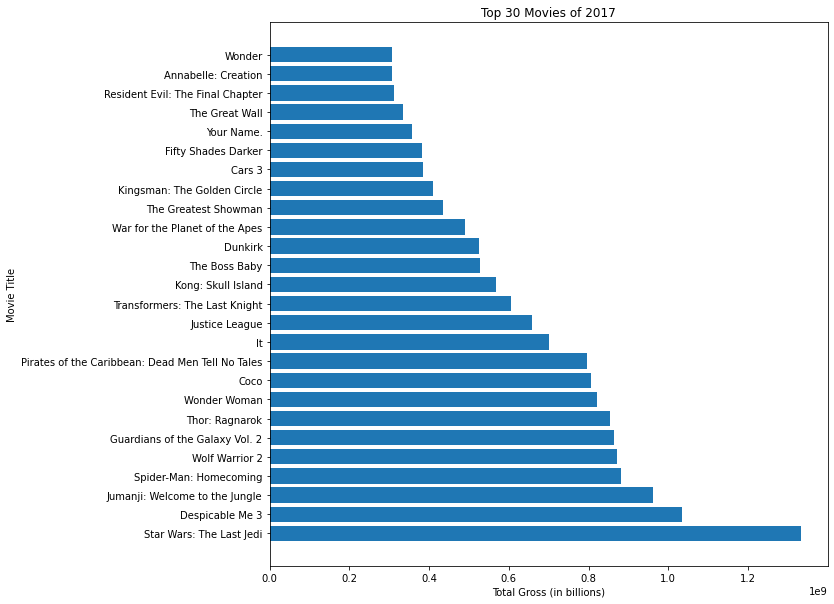

In [51]:
plt.figure(figsize=(10,10))
plt.barh(top30_2017['title'], top30_2017['total_gross'])
plt.xlabel('Total Gross (in billions)')
plt.ylabel('Movie Title')
plt.title('Top 30 Movies of 2017')

In [ ]:
top30_2017.head()